In [18]:
# Data manipulation and analysis
import numpy as np 
import pandas as pd 

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Data scaling
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# Column transformer
from sklearn.compose import ColumnTransformer

# Model pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Resampling techniques for imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, AllKNN, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.combine import SMOTEENN


# Cross-validation and hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Modeling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# XGBoost
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, make_scorer, fbeta_score

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Model saving
import pickle

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Set the option to display all columns
pd.set_option('display.max_columns', None)

## **Business Problem**

**Context:** The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider. 

### **Target Audience**
The primary target audience for this project includes:

- **Business Executives and Stakeholders**: Interested in understanding how the predictive model can help reduce customer churn and improve customer retention strategies, leading to better business outcomes and higher customer lifetime value.
- **Marketing Team**: Focused on leveraging the model to identify high-risk customers for targeted retention campaigns.
- **Customer Support Team**: Using the model's predictions to proactively address issues with customers who are likely to churn.
- **Product Development Team**: Interested in identifying which features or services are most strongly correlated with churn, to enhance customer satisfaction.

### **Problem Statement**
Customer churn is a significant issue for the telecommunications industry, where retaining existing customers is often more cost-effective than acquiring new ones. The problem is that telecom companies struggle to predict which customers are likely to churn, which makes it challenging to take proactive steps to prevent it.

### **Goals**
The primary goals of this project are:

- **Predict Customer Churn**: Develop a machine learning model that accurately predicts whether a customer will churn (leave the company) or stay, based on available features such as customer demographics, service usage, and contract type.
- **Improve Retention Strategies**: Use the model's predictions to identify high-risk customers and implement targeted retention strategies, such as offering promotions or better service.
- **Increase Customer Lifetime Value (CLV)**: By retaining more customers, the company can increase CLV, improve revenue, and reduce the costs associated with acquiring new customers.

### **Analytic Approach**
The analytic approach used in this project involves the following steps:

1. **Data Preprocessing**:
   - Clean the data by handling missing values, encoding categorical variables, and scaling numerical features.
   - Use resampling techniques such as **SMOTE** (Synthetic Minority Over-sampling Technique) to handle imbalanced classes (more non-churning customers than churning ones).

2. **Model Development**:
   - Train multiple machine learning classifiers (e.g., **Logistic Regression**, **Random Forest**, **XGBoost**) to predict customer churn.
   - Use **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning to improve model performance.

3. **Model Evaluation**:
   - Evaluate the models using several metrics to determine their effectiveness in predicting customer churn. This includes **accuracy**, **precision**, **recall**, **F1 score**, and **ROC-AUC**.

### **Metric Evaluation**
The following evaluation metrics will be used to assess the performance of the models:

- **Accuracy**: The percentage of correctly predicted instances. It is a general measure of the model's performance.
- **Precision**: The ratio of true positive predictions to the total positive predictions. It helps identify how many of the predicted churns were actual churns.
- **Recall**: The ratio of true positive predictions to the total actual positive instances. It is crucial in identifying how well the model detects customers who are likely to churn.
- **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure of model performance, especially for imbalanced datasets.
- **ROC-AUC**: The area under the Receiver Operating Characteristic curve. It evaluates the model’s ability to distinguish between the churn and non-churn classes, especially useful for imbalanced datasets.

### **False Positive (FP) and False Negative (FN) in Dollar Terms**

#### Definitions:
- **False Positive (FP)**: These are the customers who were predicted to **churn (1)** by the model, but in reality, they did **not churn (0)**.
  - **Business Impact**: This can lead to **wasted marketing efforts**, **unnecessary retention offers**, or **resources allocated** for customers who were not at risk of leaving. The company may waste resources like special offers or retention campaigns, which could have been better targeted elsewhere.

- **False Negative (FN)**: These are the customers who were predicted to **stay (0)** by the model, but in reality, they **did churn (1)**.
  - **Business Impact**: This is more critical because it means that at-risk customers are **missed by the model**, and the company doesn’t take any action to retain them, potentially resulting in **revenue loss** and **lower customer lifetime value**.

#### **Example Calculation of FP and FN in Dollar Terms**

##### **Assumptions:**
- **Customer Lifetime Value (CLV)**: Average Monthly Charges × 12 Months = 65.32 × 12 = $784
- **Retention cost** (for each customer identified as high-risk): $50
- **Marketing and retention costs** associated with a False Positive (FP): $50 per customer
- **Loss due to False Negative (FN)** (revenue lost from customers who churned but were not identified): $784 per customer

##### **Example:**

- **False Positive (FP)**: 100 customers incorrectly predicted to churn but actually stayed.
  - **Cost of False Positives** = 100 * $50 = **$5,000**
    - These are resources spent on customers who didn't need retention efforts.

- **False Negative (FN)**: 50 customers incorrectly predicted to stay but actually churned.
  - **Loss due to False Negatives** = 50` * $784 = **$39,200**
    - This represents the lost revenue from customers who churned without the company being able to intervene.

#### **Business Impact**:
- **FP Cost**: $5,000 is spent unnecessarily on retention campaigns and offers for customers who were not likely to churn.
- **FN Loss**: $39,200 is lost because customers who were likely to churn weren’t identified and retained.

### **Conclusion**
By minimizing **FN**, the company can improve its retention efforts and **reduce revenue loss**. While **FP** leads to **wasted marketing resources**, the business impact is less severe than missing out on high-risk customers. Therefore, efforts should be made to fine-tune the model to detect as many churn risks as possible without sacrificing performance in terms of **FP**.

## **Data Understanding**

### **Note:**
- This dataset is related to customer churn analysis in a telecommunications company.
- The dataset is imbalanced, with the majority of customers not experiencing churn (not cancelling their subscription).
- Most features in the dataset are categorical (Nominal), with a few ordinal categorical features. The **`InternetService`** feature is ordinal, while features like **`Dependents`**, **`OnlineSecurity`**, **`OnlineBackup`**, **`DeviceProtection`**, **`TechSupport`**, **`Contract`**, **`PaperlessBilling`**, **`MonthlyCharges`**, and **`Churn`** are nominal categorical.
- The **`tenure`** (duration of subscription) and **`MonthlyCharges`** (monthly fee) features are numeric.
- Each row in the data represents a customer with attributes related to their subscription status, indicating whether they have churned (cancelled) or not.

### **Atribute Information**

| Attribute                | Data Type, Length       | Description                                                |
|--------------------------|-------------------------|------------------------------------------------------------|
| `Dependents`              | Text (String)           | Whether the customer has dependents (Yes/No).               |
| `tenure`                  | Integer (Numeric)       | The number of months the customer has stayed with the company. |
| `OnlineSecurity`          | Text (String)           | Whether the customer has online security (Yes/No).         |
| `OnlineBackup`            | Text (String)           | Whether the customer has online backup (Yes/No).           |
| `InternetService`         | Text (String)           | Type of internet service (DSL/Fiber optic/No).             |
| `DeviceProtection`        | Text (String)           | Whether the customer has device protection (Yes/No).       |
| `TechSupport`             | Text (String)           | Whether the customer has tech support (Yes/No).            |
| `Contract`                | Text (String)           | Type of contract (Month-to-month, One year, Two year).     |
| `PaperlessBilling`        | Text (String)           | Whether the customer uses paperless billing (Yes/No).      |
| `MonthlyCharges`          | Float (Numeric)         | The monthly charge the customer is paying for the service. |
| `Churn`                   | Text (String)           | Whether the customer has churned (Yes/No).                 |


## **Dataset Overview**

In [19]:
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## **Duplicate and Missing Values Investigation**

In [20]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(77)

In [22]:
df.drop_duplicates(inplace=True)

## **Checking Unique Values from all columns**

In [23]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in column 'Dependents':
['Yes' 'No']


Unique values in column 'tenure':
[ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]


Unique values in column 'OnlineSecurity':
['No' 'Yes' 'No internet service']


Unique values in column 'OnlineBackup':
['No' 'Yes' 'No internet service']


Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']


Unique values in column 'DeviceProtection':
['Yes' 'No internet service' 'No']


Unique values in column 'TechSupport':
['Yes' 'No' 'No internet service']


Unique values in column 'Contract':
['Month-to-month' 'Two year' 'One year']


Unique values in column 'PaperlessBilling':
['Yes' 'No']


Unique values in column 'MonthlyCharges':
[ 72.9   82.65  47.85 ...  58.45  23.65 108.5 ]


Unique values in column 'Churn':
['Yes' 'No']




## **Address Redundant Values**
there are a reduntdant values for `No internet service` and `No` (since they represent the same concept)

In [24]:
# Define a dictionary of redundant values to replace
redundant_values_map = {
    'No internet service': 'No',  # Replace 'No internet service' with 'No'
}

# Loop through each column and replace redundant values
for col in df.columns:
    # Replace redundant values in the column
    df[col] = df[col].replace(redundant_values_map)

# Check the unique values again after replacement
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Unique values in column '{col}': {unique_vals}\n")


Unique values in column 'Dependents': ['Yes' 'No']

Unique values in column 'tenure': [ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]

Unique values in column 'OnlineSecurity': ['No' 'Yes']

Unique values in column 'OnlineBackup': ['No' 'Yes']

Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']

Unique values in column 'DeviceProtection': ['Yes' 'No']

Unique values in column 'TechSupport': ['Yes' 'No']

Unique values in column 'Contract': ['Month-to-month' 'Two year' 'One year']

Unique values in column 'PaperlessBilling': ['Yes' 'No']

Unique values in column 'MonthlyCharges': [ 72.9   82.65  47.85 ...  58.45  23.65 108.5 ]

Unique values in column 'Churn': ['Yes' 'No']



## **Check Imbalance**
According to the value of **Imbalance Ratio (IR)**, the imbalanced datasets are divided into three classes:

* datasets with low imbalance (IR is between 1.5 and 3)

* datasets with medium imbalance (IR is between 3 and 9)

* datasets with high imbalance (IR is higher than 9)]

In [25]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734597
Yes    0.265403
Name: proportion, dtype: float64

In [26]:

def calculate_imbalance_ratio(data, target_column):
    """
    Calculate the imbalance ratio (IR) of a binary classification dataset.

    Parameters:
    - data (pd.DataFrame): The dataset containing the target column.
    - target_column (str): The name of the target column.

    Returns:
    - float: The imbalance ratio (IR), or None if the dataset is invalid.
    """
    class_counts = data[target_column].value_counts()
    
    if len(class_counts) < 2:
        print("Error: Target column must have at least two unique classes.")
        return None
    
    majority_count = class_counts.max()
    minority_count = class_counts.min()
    
    # Avoid division by zero
    if minority_count == 0:
        print("Warning: No minority class instances found. IR is infinite.")
        return float('inf')

    imbalance_ratio = majority_count / minority_count
    return imbalance_ratio

# Compute imbalance ratio
IR = calculate_imbalance_ratio(df, 'Churn')

# Classify the imbalance ratio
if IR is not None:
    if 1 <= IR < 3:
        print(f"Low Imbalance Ratio: {IR:.2f}")
    elif 3 <= IR < 9:
        print(f"Medium Imbalance Ratio: {IR:.2f}")
    elif IR >= 9:
        print(f"High Imbalance Ratio: {IR:.2f}")


Low Imbalance Ratio: 2.77


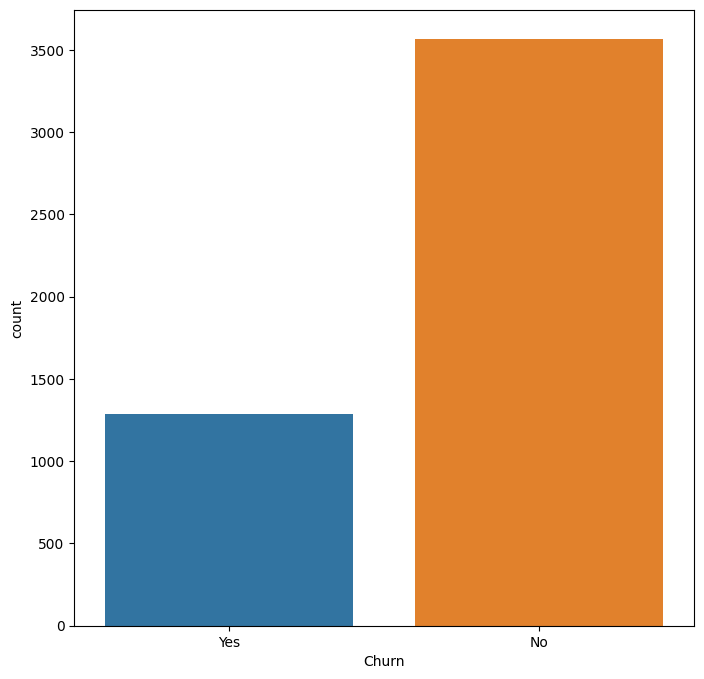

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(df, x='Churn', hue='Churn')
plt.show()

## **Converting the Target into Numerical Variable**

In [28]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

## **Export the Cleaned Dataset**

In [48]:
df.to_csv('cleaned_data_telco_customer_churn.csv', index=False)

## **Define X and y**

In [29]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

## **Preprocessing Column Transformer**

In [30]:
# Get the list of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: ['tenure', 'MonthlyCharges', 'Churn']
Categorical columns: ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


In [31]:
# Define numerical, ordinal, and nominal categorical features
num_features = ['tenure', 'MonthlyCharges']
ordinal_features = ['InternetService', 'Contract']  # Ordinal features
nominal_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']  # Nominal features

# Define the ordinal categories for each ordinal feature as lists
ordinal_categories = {
    'InternetService': ['No', 'DSL', 'Fiber optic'],  # Order: No < DSL < Fiber optic
    'Contract': ['Month-to-month', 'One year', 'Two year']  # Order: Month-to-month < One year < Two year
}

# Preprocessor with scaler choice
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler())]), num_features),  # Scaling numerical features
        ('ord', Pipeline([('ordinal', OrdinalEncoder(mapping=[
            {'col': 'InternetService', 'mapping': {v: i for i, v in enumerate(ordinal_categories['InternetService'])}},
            {'col': 'Contract', 'mapping': {v: i for i, v in enumerate(ordinal_categories['Contract'])}}
        ]))]), ordinal_features),  # Encoding ordinal features
        ('cat', Pipeline([('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))]), nominal_features)  # One-Hot Encoding nominal features
    ]
)

## **Cross Validation for Find the Best Test Size, Model, and Resampler**

In [32]:
# Initialize models and resamplers (as already provided)
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    XGBClassifier(random_state=42, eval_metric='logloss'),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
]

model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Random Forest', 'SVC']

# Define resamplers
resamplers = {
    'SMOTE': SMOTE(sampling_strategy='auto', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='auto', random_state=42),
    'RandomOverSampler': RandomOverSampler(sampling_strategy='auto', random_state=42),
    'Smoteen' : SMOTEENN(sampling_strategy='auto', random_state=42),
    'NearMiss': NearMiss(version=1),
    'TomekLinks': TomekLinks(sampling_strategy='auto'),
    'AllKNN': AllKNN(sampling_strategy='auto'),
    'CondensedNearestNeighbour': CondensedNearestNeighbour(sampling_strategy='auto', random_state=42),
    'EditedNearestNeighbours': EditedNearestNeighbours(sampling_strategy='auto'),
    'ADASYN': ADASYN(sampling_strategy='auto', random_state=42),
}

In [45]:
# Initialize lists to store results
list_avg_accuracy_score = []
list_avg_recall_score = []
list_avg_f2_score = []
list_std_score = []
list_resampler = []
list_model = []
list_test = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for resampler_name, resampler in resamplers.items():
    for model, model_name in zip(models, model_names):
        # Create pipeline with preprocessing, resampling, and model
        pipeline = ImbPipeline([('preprocessor', preprocessor),
                                ('resampler', resampler),
                                ('model', model)])
        
        # Perform cross-validation and get metrics
        accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(recall_score), n_jobs=-1)
        f2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
        
        # Store scores and results
        list_avg_accuracy_score.append(accuracy_scores.mean())
        list_avg_recall_score.append(recall_scores.mean())
        list_avg_f2_score.append(f2_scores.mean())
        list_std_score.append(accuracy_scores.std()) 
        list_resampler.append(resampler_name)
        list_model.append(model_name)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Resampler': list_resampler,
    'Model': list_model,
    'Avg Accuracy Score': list_avg_accuracy_score,
    'Avg Recall Score': list_avg_recall_score,
    'Avg F2 Score': list_avg_f2_score,
    'Standard Deviation': list_std_score
})

# Sort by Average F2 Score 
sorted_results = results_df.sort_index().reset_index().sort_values(by = 'Avg F2 Score',ascending=False)

# Display the sorted results
sorted_results.head(20)

,index,Resampler,Model,Avg Accuracy Score,Avg Recall Score,Avg F2 Score,Standard Deviation
40,40,AllKNN,Gradient Boosting,0.715353,0.843689,0.732258,0.005120
38,38,AllKNN,Logistic Regression,0.712776,0.832039,0.723928,0.009777
56,56,ADASYN,Logistic Regression,0.715864,0.826214,0.721768,0.007470
20,20,Smoteen,Logistic Regression,0.721276,0.820388,0.720682,0.015754
41,41,AllKNN,Random Forest,0.698869,0.834951,0.719156,0.011900
52,52,EditedNearestNeighbours,Gradient Boosting,0.732869,0.802913,0.715006,0.007603
8,8,RandomUnderSampler,Logistic Regression,0.742655,0.794175,0.714368,0.007339
2,2,SMOTE,Logistic Regression,0.743169,0.790291,0.712101,0.011389
14,14,RandomOverSampler,Logistic Regression,0.743170,0.790291,0.712022,0.008522
22,22,Smoteen,Gradient Boosting,0.737763,0.791262,0.710068,0.010737


### **Best resampler and model after Cross Validation**

- Resampler: AllKNN

- Model: Gradient Boosting


## **Benchmark Model (Using Best Crossval)**

Classification Report for Test Size = 0.2:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       713
           1       0.48      0.84      0.61       258

    accuracy                           0.71       971
   macro avg       0.70      0.75      0.69       971
weighted avg       0.80      0.71      0.73       971

Classification Report for Test Size = 0.25:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       892
           1       0.47      0.84      0.60       322

    accuracy                           0.71      1214
   macro avg       0.69      0.75      0.68      1214
weighted avg       0.80      0.71      0.72      1214

Classification Report for Test Size = 0.3:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1070
           1       0.48      0.85      0.61       386

    accuracy                           0.71      145

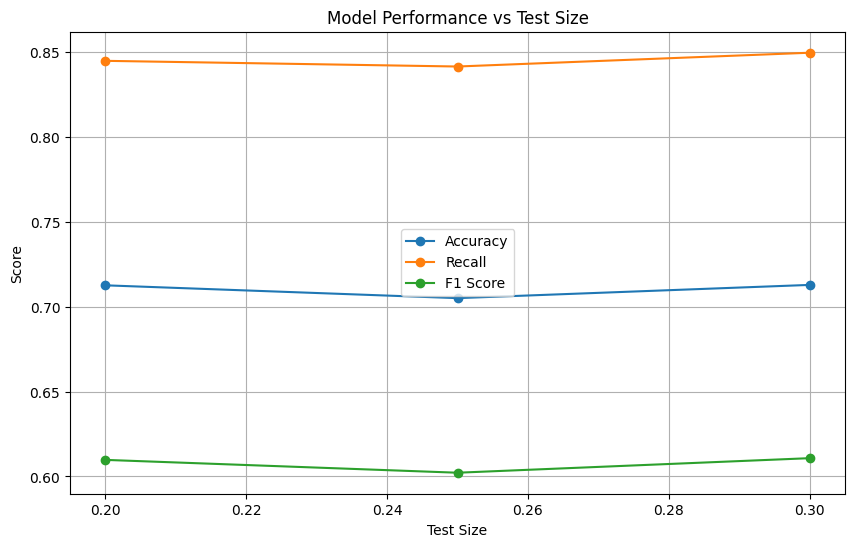

Best Test Size based on Recall Score: 0.3


In [33]:
# List of test sizes to evaluate
test_sizes = [0.2, 0.25, 0.3]

# Initialize lists to store metrics for each test size
accuracy_scores = []
recall_scores = []
f1_scores = []

# Loop through test sizes
for test_size in test_sizes:
    # Train-test split for each test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Define the model
    model = GradientBoostingClassifier(random_state=42)

    # Create the pipeline with preprocessing and resampling
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor), 
        ('resampler', AllKNN(sampling_strategy='auto')),  # Use AllKNN for resampling
        ('model', model)  # Model: GradientBoosting
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred_benchmark = pipeline.predict(X_test)

    # Print classification report for the current test size
    print(f"Classification Report for Test Size = {test_size}:")
    print(classification_report(y_test, y_pred_benchmark))

    # Store the evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_benchmark))
    recall_scores.append(recall_score(y_test, y_pred_benchmark))
    f1_scores.append(f1_score(y_test, y_pred_benchmark))

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.plot(test_sizes, accuracy_scores, label='Accuracy', marker='o')

# Plot Recall
plt.plot(test_sizes, recall_scores, label='Recall', marker='o')

# Plot F1 Score
plt.plot(test_sizes, f1_scores, label='F1 Score', marker='o')

# Customize plot
plt.xlabel('Test Size')
plt.ylabel('Score')
plt.title('Model Performance vs Test Size')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Optional: Print out the best test size based on Recall Score
best_test_size_index = recall_scores.index(max(recall_scores))  # Find the index of the best Recall score
best_test_size = test_sizes[best_test_size_index]

print(f"Best Test Size based on Recall Score: {best_test_size}")


### **Benchmark Model Insight**

* Optimum Test Size is 30% with higher avg Accuracy, F2, and Recall than 25% and 20% Test Size

* The accuracy score stands at 71%, which is moderate. However, since the primary focus is to reduce False Negatives (FN), recall is the key metric for evaluation.

* False Negatives (FN) are less frequent than False Positives (FP), but their impact is more significant due to the higher associated cost.

* The focus should shift toward optimizing the balance between the costs incurred by False Positives (FP) and False Negatives (FN).

### **Confussion Matrix Benchmark**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Create the pipeline with preprocessing and resampling
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # Assuming preprocessor is already defined elsewhere
    ('resampler', AllKNN(sampling_strategy='auto')),  # Use SMOTE for resampling
    ('model', model)  # Model: GradientBoosting
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_benchmark = pipeline.predict(X_test)

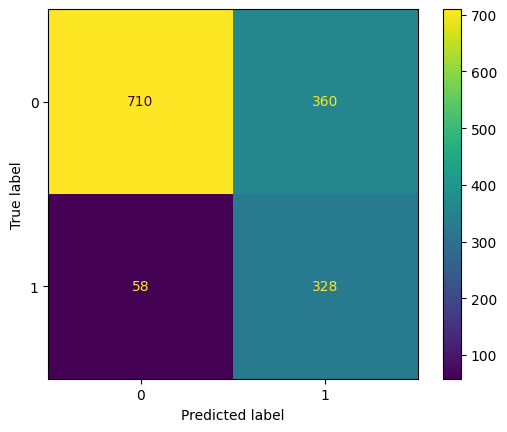

In [35]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_benchmark)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### **Estimated Cost FN and FP in Benchmark Model**
- FN: 58 x 784 = $45,472

- FP: 360 x 50 = $18,000

Total Cost: FN + FP = $63,472

## **Hyperparameter Tuning**

In [ ]:
# Initialize models with random states
models_to_tune = {
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Define the hyperparameter grid for each model
param_grid_model = {
    'GradientBoosting': {
        'model__n_estimators': [100, 200, 300, 500, 700, 1000],
        'model__max_depth': [3, 5, 7, 9, 11, 15],
        'model__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
        'model__subsample': [0.7, 0.8, 1.0],
        'model__min_samples_split': [2, 5, 10, 20],
    },
    'LogisticRegression': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'newton-cg'],  # Only LogisticRegression has 'solver'
        'model__max_iter': [200, 300, 500, 1000],
    },
    'RandomForest': {
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_depth': [10, 15, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300, 500],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.7, 0.8, 1.0],
        'model__colsample_bytree': [0.7, 0.8, 1.0],
    }
}

# Define the hyperparameter grid for the resamplers
param_grid_resampler = {
    'RandomOverSampler': {
        'resampler__sampling_strategy': ['auto', 0.5, 0.7, 0.8, 1.0],
    },
    'SMOTE': {
        'resampler__sampling_strategy': ['auto', 0.5, 0.7, 0.8, 1.0],
        'resampler__k_neighbors': [3, 5, 7, 9, 15],
    },
    'RandomUnderSampler': {
        'resampler__sampling_strategy': ['auto', 0.5, 0.7, 0.8, 1.0],
    },
    'AllKNN': {
        'resampler__sampling_strategy': ['auto'],
    },
    'ADASYN': {
        'resampler__sampling_strategy': ['auto', 0.5, 0.7, 0.8, 1.0],
        'resampler__n_neighbors': [3, 5, 7, 9],
    },
    'EditedNearestNeighbours': {
        'resampler__sampling_strategy': ['auto'],
        'resampler__n_neighbors': [3, 5, 7, 9],
    }
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
list_avg_accuracy_score2 = []
list_avg_recall_score2 = []
list_avg_f2_score2 = []
list_std_score2 = []
list_resampler2 = []
list_model2 = []

# Loop through test sizes
for test_size in [0.3]:
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Loop through models and resamplers for hyperparameter tuning
    for model_name, model in models_to_tune.items():
        for resampler_name, resampler in param_grid_resampler.items():
            # Create pipeline with preprocessing, resampler, and model
            pipeline_steps = [('preprocessor', preprocessor)]  # Assuming preprocessor is defined elsewhere

            # Add resampler to pipeline
            resampler_instance = resamplers.get(resampler_name)
            pipeline_steps.append(('resampler', resampler_instance))
                
            pipeline_steps.append(('model', model))  # Add model (GradientBoosting, LogisticRegression, etc.)
            pipeline = ImbPipeline(pipeline_steps)

            # Randomized search with F1 scoring
            randomized_search = RandomizedSearchCV(
                estimator=pipeline,
                param_distributions={**param_grid_model[model_name], **param_grid_resampler[resampler_name]},  # Tune both model and resampler hyperparameters
                n_iter=100,  # Increased iterations to explore more combinations
                cv=cv,
                scoring= make_scorer(fbeta_score, beta=2),  
                n_jobs=-1,  # Use all available CPU cores
                random_state=42
            )

            # Fit the randomized search to training data
            randomized_search.fit(X_train, y_train)

            # Store the best parameters for this model-resampler combination
            print(f"Best Parameters for {model_name} with {resampler_name}: {randomized_search.best_params_}")

            # Evaluate the best model on the test set
            y_pred = randomized_search.best_estimator_.predict(X_test)

            # Calculate accuracy score, recall score, and f2 score
            accuracy_benchmark = accuracy_score(y_test, y_pred)
            recall_benchmark = recall_score(y_test, y_pred)
            f2_score_benchmark = fbeta_score(y_test, y_pred, beta=2)

            # Store the results
            list_avg_accuracy_score2.append(accuracy_benchmark)
            list_avg_recall_score2.append(recall_benchmark)
            list_avg_f2_score2.append(f2_score_benchmark)
            list_std_score2.append(np.std(y_pred))  # Standard deviation of predictions
            list_resampler2.append(resampler_name)
            list_model2.append(model_name)

# Create a DataFrame to display results
tuning_result = pd.DataFrame({
    'Model': list_model2,
    'Resampler': list_resampler2,
    'Avg Accuracy Score': list_avg_accuracy_score2,
    'Avg Recall Score': list_avg_recall_score2,
    'Avg F2 Score': list_avg_f2_score2,
    'Standard Deviation': list_std_score2
})

# Sort by Average F2 Score, or any other metric of interest
tuning_result = tuning_result.reset_index().sort_values(by='Avg F2 Score', ascending=False)

# Display sorted results (for local running)
tuning_result


Best Parameters for GradientBoosting with RandomOverSampler: {'resampler__sampling_strategy': 1.0, 'model__subsample': 0.7, 'model__n_estimators': 700, 'model__min_samples_split': 2, 'model__max_depth': 3, 'model__learning_rate': 0.001}
Best Parameters for GradientBoosting with SMOTE: {'resampler__sampling_strategy': 1.0, 'resampler__k_neighbors': 9, 'model__subsample': 1.0, 'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best Parameters for GradientBoosting with RandomUnderSampler: {'resampler__sampling_strategy': 1.0, 'model__subsample': 0.7, 'model__n_estimators': 700, 'model__min_samples_split': 2, 'model__max_depth': 3, 'model__learning_rate': 0.001}
Best Parameters for GradientBoosting with AllKNN: {'resampler__sampling_strategy': 'auto', 'model__subsample': 0.8, 'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best Parameters for GradientBoosting with A

,Model,Resampler,Avg Accuracy Score,Avg Recall Score,Avg F2 Score,Standard Deviation
19,XGBoost,SMOTE,0.739698,0.857513,0.752615,0.497480
8,LogisticRegression,RandomUnderSampler,0.708791,0.880829,0.751547,0.499953
1,GradientBoosting,SMOTE,0.748626,0.844560,0.749081,0.495634
11,LogisticRegression,EditedNearestNeighbours,0.664148,0.911917,0.748618,0.497047
10,LogisticRegression,ADASYN,0.701923,0.880829,0.748239,0.500000
21,XGBoost,AllKNN,0.727335,0.860104,0.748085,0.498673
22,XGBoost,ADASYN,0.712912,0.870466,0.747331,0.499728
7,LogisticRegression,SMOTE,0.725275,0.860104,0.747075,0.498819
5,GradientBoosting,EditedNearestNeighbours,0.646291,0.919689,0.744859,0.494154
6,LogisticRegression,RandomOverSampler,0.720467,0.860104,0.744729,0.499127


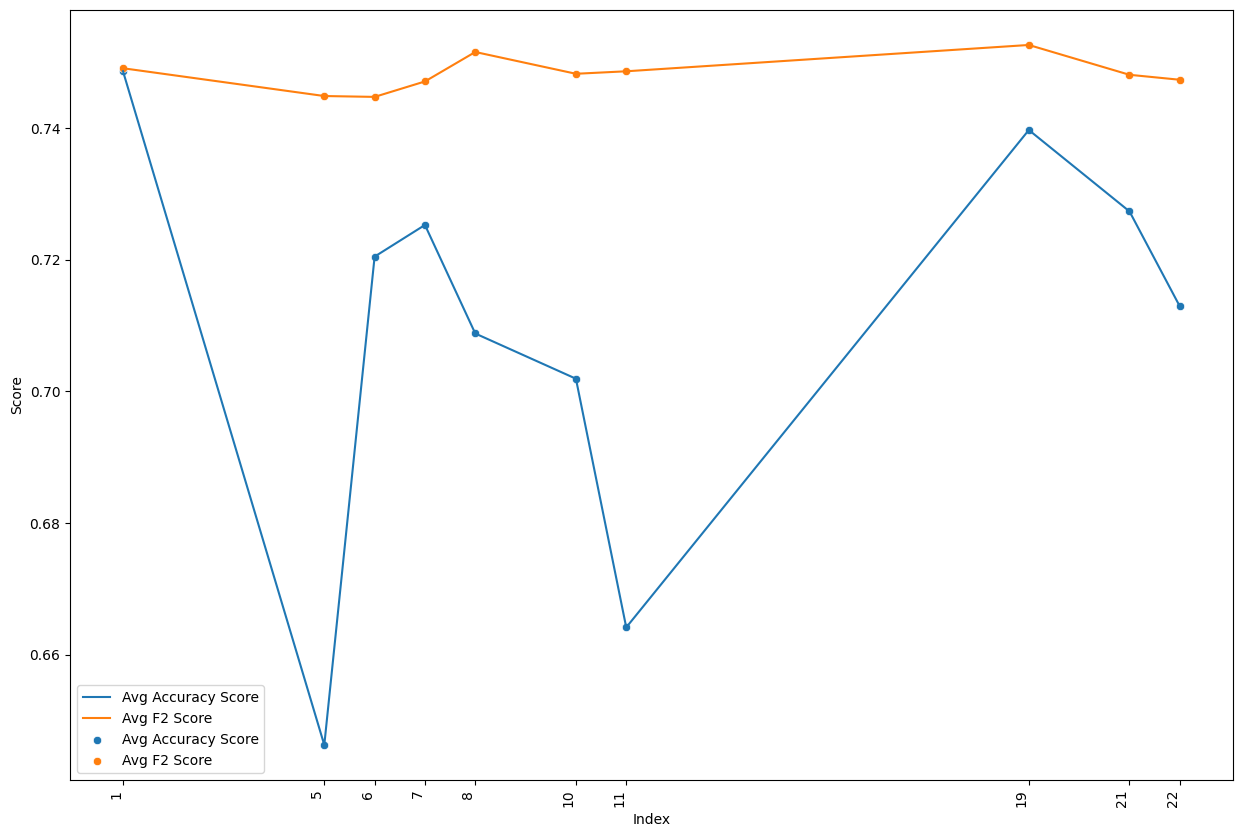

In [145]:
plt.figure(figsize=(15,10))
# Plotting Avg Accuracy Score and Avg F2 Score
sns.lineplot(data=tuning_result.head(10), x='index', y='Avg Accuracy Score', label='Avg Accuracy Score')
sns.lineplot(data=tuning_result.head(10), x='index', y='Avg F2 Score', label='Avg F2 Score')
sns.scatterplot(data=tuning_result.head(10), x='index', y='Avg Accuracy Score', label='Avg Accuracy Score')
sns.scatterplot(data=tuning_result.head(10), x='index', y='Avg F2 Score', label='Avg F2 Score')

# Rotate x-axis labels for better visibility

plt.xticks(rotation=90, ha='right', ticks=tuning_result['index'].head(10))

# Labeling the axes
plt.xlabel('Index')
plt.ylabel('Score')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


## **Adressing Alogorithm with highest F2 and Accuracy**

In [146]:
tuning_result[tuning_result['index'] == 1]

,index,Model,Resampler,Avg Accuracy Score,Avg Recall Score,Avg F2 Score,Standard Deviation
1,1,GradientBoosting,SMOTE,0.748626,0.84456,0.749081,0.495634


## **Retuning the Model with Best Resampler**

In [36]:
# Initialize models with random states
grad_model = {
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

# Define the hyperparameter grid for GradientBoosting
param_grid_model = {
    'GradientBoosting': {
        'model__n_estimators': [200, 400, 600, 1000],
        'model__max_depth': [3, 5, 7, 9, 11, 15],
        'model__learning_rate': [None, 0.001, 0.01, 0.05, 0.1, 0.2],
    }
}

# Define the hyperparameter grid for the resamplers
param_grid_resampler = {
    'AllKNN': {
        'resampler__sampling_strategy': ['auto'],
        'resampler__n_neighbors': [3, 6, 19, 12, 15],  # n_neighbors for AllKNN
        'resampler__allow_minority': [True, False],  # Correct parameter for AllKNN
    },
    'SMOTE': {
        'resampler__sampling_strategy': ['auto', 0.5, 0.7, 0.8, 1.0],  # Sampling strategies
        'resampler__k_neighbors': [3, 5, 7, 9],  # k_neighbors for SMOTE
        'resampler__random_state': [42],  # Ensuring consistency across runs
    }
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
top_list_avg_accuracy_score = []
top_list_avg_recall_score = []
top_list_avg_f2_score = []
top_list_std_score = []
top_list_resampler = []
top_list_model = []

# Train-test split (using fixed test size of 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Loop through models and resamplers for hyperparameter tuning
for model_name, model in grad_model.items():
    for resampler_name, resampler in param_grid_resampler.items():
        # Create pipeline with preprocessing, resampler, and model
        pipeline_steps = [('preprocessor', preprocessor)]  # Assuming preprocessor is defined elsewhere

        # Select the resampler based on the resampler_name
        if resampler_name == 'AllKNN':
            resampler_instance = AllKNN(sampling_strategy='auto')
        elif resampler_name == 'SMOTE':
            resampler_instance = SMOTE(sampling_strategy='auto', random_state=42)

        pipeline_steps.append(('resampler', resampler_instance))

        # Add model to pipeline
        pipeline_steps.append(('model', model)) 
        pipeline = ImbPipeline(pipeline_steps)

        # Randomized search with F2 scoring
        randomized_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={**param_grid_model[model_name], **param_grid_resampler[resampler_name]},  # Tune both model and resampler hyperparameters
            n_iter=200,  
            cv=cv,
            scoring='recall',  # Use Recall scoring for minimizing FN 
            n_jobs=-1,  # Use all available CPU cores
            random_state=42
        )

        # Fit the randomized search to training data
        randomized_search.fit(X_train, y_train)

        # Store the best parameters for this model-resampler combination
        print(f"Best Parameters for {model_name} with {resampler_name}: {randomized_search.best_params_}")

        # Evaluate the best model on the test set
        y_pred = randomized_search.best_estimator_.predict(X_test)

        # Calculate accuracy score, recall score, and F2 score
        accuracy_benchmark = accuracy_score(y_test, y_pred)
        recall_benchmark = recall_score(y_test, y_pred)
        f2_score_benchmark = fbeta_score(y_test, y_pred, beta=2)

        # Store the results
        top_list_avg_accuracy_score.append(accuracy_benchmark)
        top_list_avg_recall_score.append(recall_benchmark)
        top_list_avg_f2_score.append(f2_score_benchmark)
        top_list_std_score.append(np.std(y_pred))  
        top_list_resampler.append(resampler_name)
        top_list_model.append(model_name)

# Create a DataFrame to display results
gradboost_tuning_result = pd.DataFrame({
    'Model': top_list_model,
    'Avg Accuracy Score': top_list_avg_accuracy_score,
    'Avg Recall Score': top_list_avg_recall_score,
    'Avg F2 Score': top_list_avg_f2_score,
    'Standard Deviation': top_list_std_score
})

# Sort by Average F2 Score, or any other metric of interest
gradboost_tuning_result = gradboost_tuning_result.sort_values(by='Avg F2 Score', ascending=False)

gradboost_tuning_result

Best Parameters for GradientBoosting with AllKNN: {'resampler__sampling_strategy': 'auto', 'resampler__n_neighbors': 12, 'resampler__allow_minority': False, 'model__n_estimators': 600, 'model__max_depth': 11, 'model__learning_rate': 0.001}
Best Parameters for GradientBoosting with SMOTE: {'resampler__sampling_strategy': 'auto', 'resampler__random_state': 42, 'resampler__k_neighbors': 5, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.01}


,Model,Avg Accuracy Score,Avg Recall Score,Avg F2 Score,Standard Deviation
1,GradientBoosting,0.742445,0.831606,0.737931,0.495542
0,GradientBoosting,0.575549,0.937824,0.724000,0.474846


In [40]:
# Initialize models with random states
grad_model = {
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

# Define the hyperparameter grid for GradientBoosting
param_grid_model = {
    'GradientBoosting': {
        'model__n_estimators': [200, 400, 600, 1000],
        'model__max_depth': [3, 5, 7, 9, 11, 15],
        'model__learning_rate': [None, 0.001, 0.01, 0.05, 0.1, 0.2],
    }
}

# Define the hyperparameter grid for the resamplers
param_grid_resampler = {
    'AllKNN': {
        'resampler__sampling_strategy': ['auto'],
        'resampler__n_neighbors': [3, 6, 19, 12, 15],  # n_neighbors for AllKNN
        'resampler__allow_minority': [True, False],  # Correct parameter for AllKNN
    }
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
top_list_avg_accuracy_score = []
top_list_avg_recall_score = []
top_list_avg_f2_score = []
top_list_std_score = []
top_list_resampler = []
top_list_model = []

# Train-test split (using fixed test size of 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Loop through models and resamplers for hyperparameter tuning
for model_name, model in grad_model.items():
    for resampler_name, resampler in param_grid_resampler.items(): 
        # Create pipeline with preprocessing, resampler, and model
        pipeline_steps = [('preprocessor', preprocessor)]  

        # Select the resampler based on the resampler_name
        if resampler_name == 'AllKNN':
            resampler_instance = AllKNN(sampling_strategy='auto')

        pipeline_steps.append(('resampler', resampler_instance))

        # Add model to pipeline
        pipeline_steps.append(('model', model)) 
        pipeline = ImbPipeline(pipeline_steps)

        # Randomized search with F2 scoring
        randomized_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={**param_grid_model[model_name], **param_grid_resampler[resampler_name]},  # Tune both model and resampler hyperparameters
            n_iter=200,  
            cv=cv,
            scoring='recall',  # Use Recall scoring for minimizing FN 
            n_jobs=-1,  # Use all available CPU cores
            random_state=42
        )

        # Fit the randomized search to training data
        randomized_search.fit(X_train, y_train)

        # Store the best parameters for this model-resampler combination
        print(f"Best Parameters for {model_name} with {resampler_name}: {randomized_search.best_params_}")

        # Evaluate the best model on the test set
        y_pred = randomized_search.best_estimator_.predict(X_test)

        # Calculate accuracy score, recall score, and F2 score
        accuracy_benchmark = accuracy_score(y_test, y_pred)
        recall_benchmark = recall_score(y_test, y_pred)
        f2_score_benchmark = fbeta_score(y_test, y_pred, beta=2)

        # Store the results
        top_list_avg_accuracy_score.append(accuracy_benchmark)
        top_list_avg_recall_score.append(recall_benchmark)
        top_list_avg_f2_score.append(f2_score_benchmark)
        top_list_std_score.append(np.std(y_pred))  
        top_list_resampler.append(resampler_name)
        top_list_model.append(model_name)

# Create a DataFrame to display results
gradboost_tuning_result = pd.DataFrame({
    'Model': top_list_model,
    'Avg Accuracy Score': top_list_avg_accuracy_score,
    'Avg Recall Score': top_list_avg_recall_score,
    'Avg F2 Score': top_list_avg_f2_score,
    'Standard Deviation': top_list_std_score
})

# Sort by Average F2 Score, or any other metric of interest
gradboost_tuning_result = gradboost_tuning_result.sort_values(by='Avg F2 Score', ascending=False)

# Display sorted results (for local running)
gradboost_tuning_result


Best Parameters for GradientBoosting with AllKNN: {'resampler__sampling_strategy': 'auto', 'resampler__n_neighbors': 12, 'resampler__allow_minority': False, 'model__n_estimators': 600, 'model__max_depth': 11, 'model__learning_rate': 0.001}


,Model,Avg Accuracy Score,Avg Recall Score,Avg F2 Score,Standard Deviation
0,GradientBoosting,0.575549,0.937824,0.724,0.474846


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Get the best estimator after the RandomizedSearchCV
best_model = randomized_search.best_estimator_

# Fit the best model on the training data (if not already done)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.44      0.61      1070
           1       0.38      0.94      0.54       386

    accuracy                           0.58      1456
   macro avg       0.67      0.69      0.57      1456
weighted avg       0.80      0.58      0.59      1456



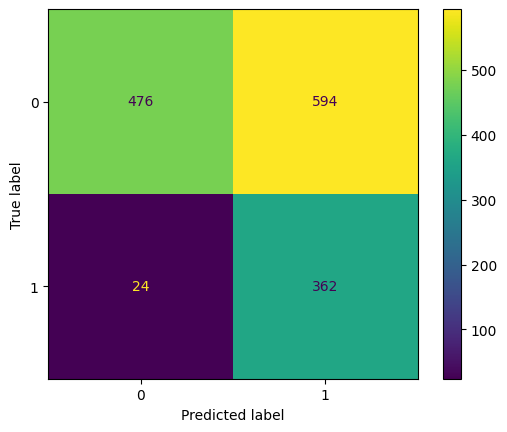

In [42]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


### **Estimated Cost FN and FP with Tuned Model**
- FN: 24 x 784 = $18,816

- FP: 594 x 50 = $29,700
Total Cost: FN + FP = $48,516

### **Tuned Model Insight**

* The accuracy score of the tuned model is 58%, which is lower when compared to the benchmark model.

* Despite the significant increase in the FP score, the reduction in FN results in a lower overall cost compared to the benchmark model.

* The tuned model’s cost is $48,516, which is $14,956 less than the benchmark model’s cost of $63,472.

## **Save Tuned Model with Pickle**

In [43]:
with open('randomized_search_model.pkl', 'wb') as f:
    pickle.dump(randomized_search, f)

# Load model
# Uncommand to load the model
# pickle.load(open('model_final.sav','rb')) 

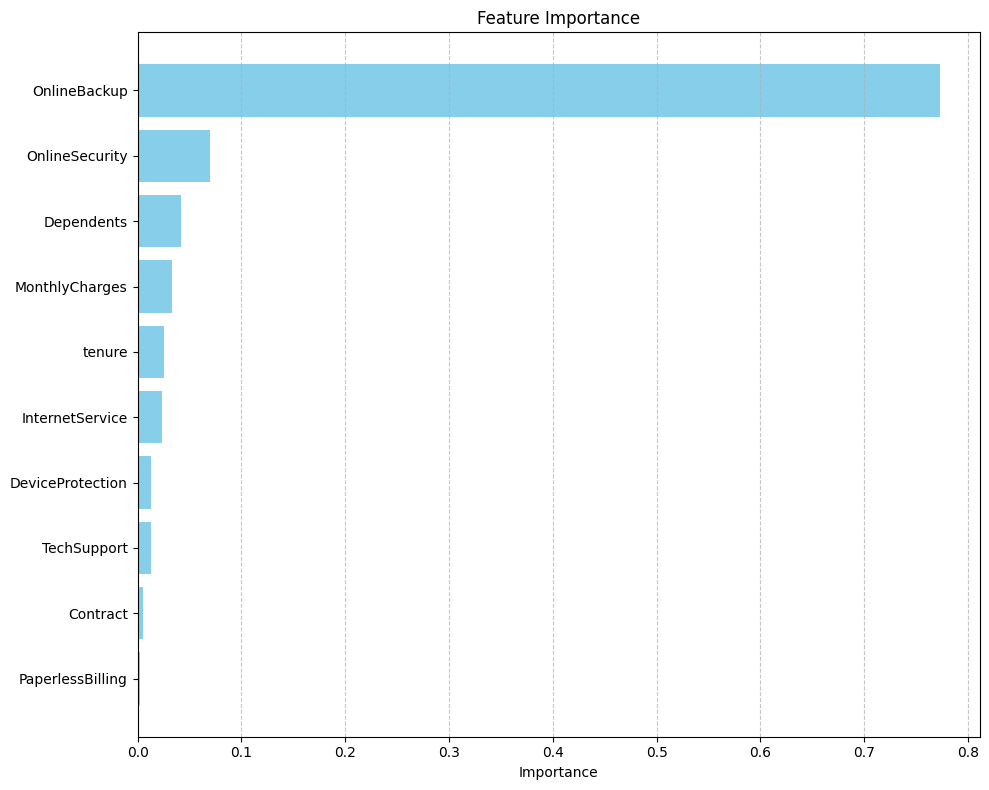

In [44]:
# Access the best model from the pipeline
best_model = randomized_search.best_estimator_

# Extract the underlying model from the pipeline
model = best_model.named_steps['model']

# Extracting feature importances from the model
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
elif hasattr(model, 'coef_'):
    feature_importances = model.coef_[0]  # For models like LogisticRegression
else:
    raise ValueError("Model does not support feature importances or coefficients.")

# Assuming X_train is a pandas DataFrame with feature names
features = X_train.columns  # Adjust this if your data is in a different format (like numpy array)

# Create a DataFrame to store the feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance value
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

### **Feature Importance Insight for Telco Churn Analysis**

- **OnlineBackup** is the most important feature, with a score of 0.75. Customers with or without online backup are strongly linked to churn.
  
- **OnlineSecurity** follows closely with an importance score of 0.20, suggesting that online security service impacts retention.

- **Dependents** and **MonthlyCharges** contribute moderately, with scores of 0.10 and 0.05, respectively. Dependents are linked to higher retention, and higher charges slightly affect churn.

- **Tenure**, **InternetService**, and **DeviceProtection** are less important, with scores between 0.04 and 0.06.

- **TechSupport**, **Contract**, and **PaperlessBilling** have minimal importance, indicating low impact on churn prediction.

### **Key Takeaways**:
- Focus on **OnlineBackup** and **OnlineSecurity** for churn prediction and retention strategies.
- Monitor **Dependents** and **MonthlyCharges** but with less priority.
- Consider deprioritizing features like **TechSupport**, **Contract**, and **PaperlessBilling**.


## **Model Limitation**

1. **Imbalanced Dataset:** The dataset is highly imbalanced, with a majority of customers not churning. This can make the model biased toward predicting non-churn cases. Despite the use of resampling techniques like SMOTE, the imbalance may still affect the model's performance, especially in detecting the minority class (churned customers).

2. **Overfitting Risks:** Due to the complexity of the model (Gradient Boosting), there is a risk of overfitting to the training data, especially when fine-tuning hyperparameters. This can lead to the model performing well on training data but failing to generalize to new, unseen data.

3. **Model Interpretability:** Complex models like Gradient Boosting and ensemble methods can often be difficult to interpret, making it challenging to understand the exact reasons behind the churn predictions. This lack of interpretability can be a barrier when trying to implement the model in a business setting where understanding the "why" behind a prediction is crucial.

4. **Computational Complexity:** The use of RandomizedSearchCV with a large number of iterations can lead to high computational costs, especially when training the model with complex algorithms and large datasets. This can be time-consuming and may require significant computational resources, particularly when performing hyperparameter tuning.

5. **Limited Domain Knowledge:** The current model's performance is limited by the available features and the lack of deep domain knowledge about the underlying reasons for churn. While some features may provide insights, a deeper understanding of customer behavior and churn drivers could lead to more meaningful features and improve model accuracy.

6. **Evaluation Metric Focus:** While recall is prioritized to minimize False Negatives (FN), the trade-off between False Positives (FP) and FN can make the model less accurate. The focus on recall may lead to a decrease in overall accuracy, which could affect how well the model is perceived by stakeholders focused on the general predictive power of the model.

## **Conclusion:**

1. **FN vs FP Cost:** The estimated cost of False Negatives (FN) is higher compared to False Positives (FP). To minimize the impact of FN, recall is prioritized as the primary evaluation metric. Focusing on improving recall helps in reducing FN costs, which are critical in churn prediction.

2. **Recall vs Accuracy:** After tuning the model, the recall score shows a reduction in FN, but this comes at the cost of a significant increase in FP, leading to a noticeable drop in accuracy. While accuracy decreases, recall remains the more important metric in this context, as reducing FN is more valuable.

3. **Cost Reduction:** Despite the lower accuracy, the tuned model leads to a significant total cost reduction compared to the benchmark model. This is due to the better FN:FP cost ratio, where reducing FN costs more than the increase in FP costs.

## **Recommendations:**

1. **Future Evaluation:** Moving forward, it is crucial to carefully determine the costs of FN and FP. This will help in selecting the right evaluation metrics, ensuring that the model aligns with the business objective of minimizing churn and optimizing the retention strategy.

2. **Improvement in Model and Techniques:** Given the time constraints and limited domain knowledge, the current model is far from perfect. To improve its performance, future work should focus on a deeper understanding of churn drivers, advanced resampling techniques, and fine-tuning the model with more sophisticated methods.

3. **Further Analysis:** More extensive exploration of other potential features, better handling of class imbalances, and incorporating domain expertise can lead to a more reliable model in the future. Regular model retraining and adjustments based on evolving data can improve predictions over time.